In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df=pd.read_csv(r'/Users/user/Documents/Cars/02 Data /Prepared Data /Clean_data_updated.csv')

# 1. Checking data and performing cleaning or manipulations 

In [4]:
df.shape

(11491, 24)

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Brand,Year,Title,Used/New,Transmission,DriveType,FuelType,FuelConsumption,...,Price,N_Doors,ColorsExt,FuelCategory,N_Seats,City,State,State_New,Average_Price,Average_Price_City
0,0,0,Ssangyong,2022,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,...,51990.0,4,White,High Consumption,5,Caringbah,NSW,New South Wales,40242.700123,45972.700000
1,1,1,MG,2022,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,...,19990.0,5,Black,Moderate,5,Brookvale,NSW,New South Wales,40242.700123,36455.306678
2,2,2,BMW,2022,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,...,108988.0,2,Grey,Moderate,4,Sylvania,NSW,New South Wales,40242.700123,59285.657895
3,3,4,Renault,2022,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6.0,...,34990.0,4,Grey,Moderate,5,Castle Hill,NSW,New South Wales,40242.700123,37270.906667
4,4,6,Land,2017,2017 Land Rover Range Rover Evoque TD4 180 HSE...,USED,Automatic,AWD,Diesel,5.1,...,62280.0,4,White,Economical,5,Blacktown,NSW,New South Wales,40242.700123,43754.352632


# 1.Deleting non numeric columns 

In [6]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['Unnamed: 0.1'])

In [7]:
#dropping unnecessary columns 
df.drop('Brand', axis=1, inplace=True)
df.drop('Title', axis=1, inplace=True)
df.drop('Used/New', axis=1, inplace=True)
df.drop('Transmission', axis=1, inplace=True)
df.drop('ColorsExt', axis=1, inplace=True)

In [8]:
df.drop('DriveType', axis=1, inplace=True)
df.drop('City', axis=1, inplace=True)
df.drop('State', axis=1, inplace=True)
df.drop('State_New', axis=1, inplace=True)

In [9]:
df.drop('Engine', axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)
df.drop('FuelType', axis=1, inplace=True)
df.drop('FuelCategory', axis=1, inplace=True)

In [10]:
df.columns

Index(['Year', 'FuelConsumption', 'Kilometers', 'BodyType', 'Price', 'N_Doors',
       'N_Seats', 'Average_Price', 'Average_Price_City'],
      dtype='object')

In [11]:
df.drop('BodyType', axis=1, inplace=True)

In [12]:
df.columns

Index(['Year', 'FuelConsumption', 'Kilometers', 'Price', 'N_Doors', 'N_Seats',
       'Average_Price', 'Average_Price_City'],
      dtype='object')

In [13]:
df.isnull().sum()

Year                  0
FuelConsumption       0
Kilometers            0
Price                 0
N_Doors               0
N_Seats               0
Average_Price         0
Average_Price_City    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11491 entries, 0 to 11490
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                11491 non-null  int64  
 1   FuelConsumption     11491 non-null  float64
 2   Kilometers          11491 non-null  float64
 3   Price               11491 non-null  float64
 4   N_Doors             11491 non-null  int64  
 5   N_Seats             11491 non-null  int64  
 6   Average_Price       11491 non-null  float64
 7   Average_Price_City  11491 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 718.3 KB


In [15]:
df.head()

,Year,FuelConsumption,Kilometers,Price,N_Doors,N_Seats,Average_Price,Average_Price_City
0,2022,8.7,5595.0,51990.0,4,5,40242.700123,45972.700000
1,2022,6.7,16.0,19990.0,5,5,40242.700123,36455.306678
2,2022,6.6,8472.0,108988.0,2,4,40242.700123,59285.657895
3,2022,6.0,1035.0,34990.0,4,5,40242.700123,37270.906667
4,2017,5.1,67662.0,62280.0,4,5,40242.700123,43754.352632


In [16]:
df.to_csv('/Users/user/Documents/Cars/02 Data /Prepared Data /Clean_data_Numeric.csv')

# 2. The elbow technique

In [17]:
# Select columns which are object type (categorical)
categorical_cols = df.select_dtypes(include=['object']).columns

In [18]:
# Use pd.get_dummies to convert categorical columns to one-hot encoded variables
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [19]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [20]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-54477449820840.45,
 -25706464449530.766,
 -17609456435792.18,
 -14086680106788.64,
 -10576714905366.309,
 -9113710798785.078,
 -7708806607679.444,
 -7069552725253.475,
 -6394906055025.593]

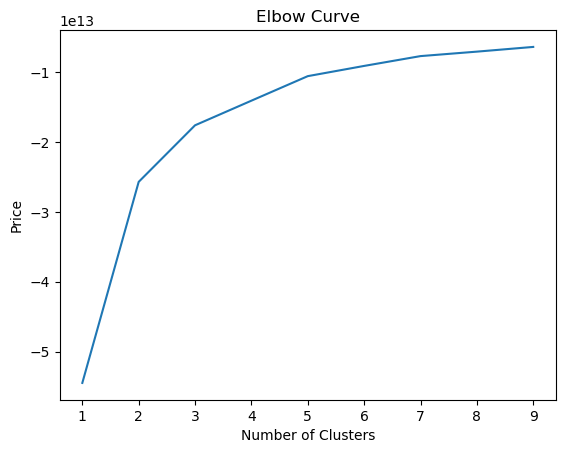

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Price')
pl.title('Elbow Curve')
pl.show()

In [22]:
#There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is three.¶

# k-means clustering

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [24]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [25]:
df['clusters'] = kmeans.fit_predict(df)

In [26]:
df.head()

,Year,FuelConsumption,Kilometers,Price,N_Doors,N_Seats,Average_Price,Average_Price_City,clusters
0,2022,8.7,5595.0,51990.0,4,5,40242.700123,45972.700000,2
1,2022,6.7,16.0,19990.0,5,5,40242.700123,36455.306678,2
2,2022,6.6,8472.0,108988.0,2,4,40242.700123,59285.657895,2
3,2022,6.0,1035.0,34990.0,4,5,40242.700123,37270.906667,2
4,2017,5.1,67662.0,62280.0,4,5,40242.700123,43754.352632,0


In [27]:
df['clusters'].value_counts()

clusters
0    5181
2    4365
1    1945
Name: count, dtype: int64

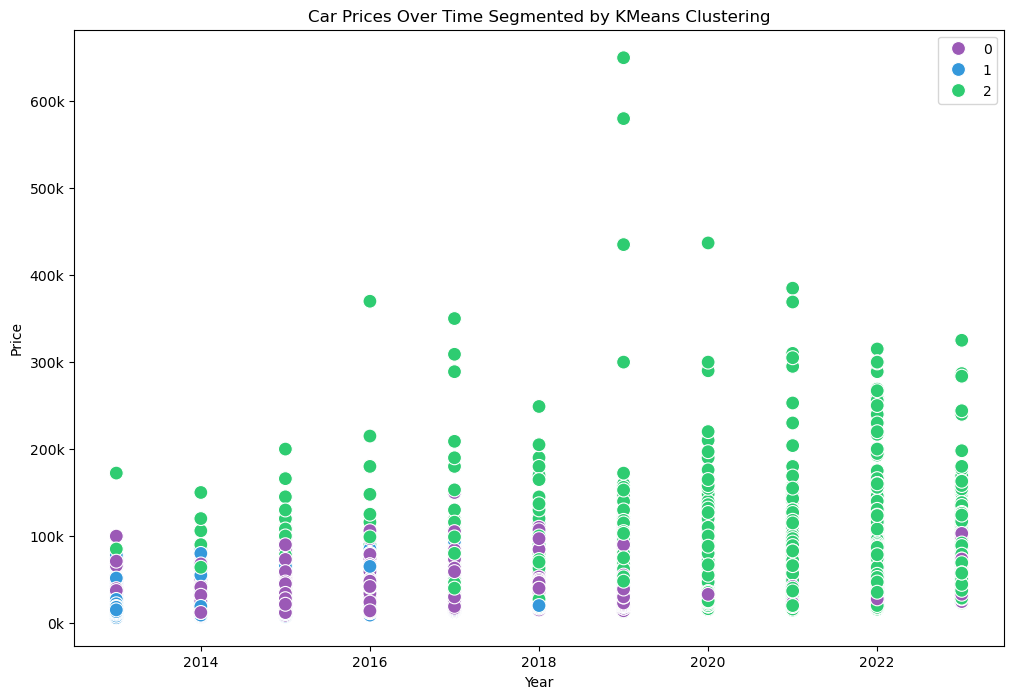

In [28]:
#plotting 
plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#9b59b6', '#3498db', '#2ecc71'])  # Dark purple, blue, green

# scatterplot 
ax = sns.scatterplot(x=df['Year'], y=df['Price'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background.
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('Year')
plt.ylabel('Price')

# title 
plt.title('Car Prices Over Time Segmented by KMeans Clustering')

# assigning names to clusters based on the label
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'blue'
df.loc[df['clusters'] == 0, 'cluster'] = 'green'

# Format the y-axis labels to show 'Price' in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

#saving chart to PNG
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Kmeans_Prices_vs_Years.png')
plt.show()


In [29]:
df.groupby('cluster').agg({'Price':['mean', 'median'], 
                         'Year':['mean', 'median'], 
                         'Kilometers':['mean', 'median'],
                           'FuelConsumption':['mean', 'median'],
                          'N_Doors':['mean', 'median'],
                          'N_Seats':['mean', 'median']})

Price                  Year             Kilometers  \
                     mean   median         mean  median           mean   
cluster                                                                  
blue         24655.627968  21999.0  2015.216887  2015.0  184246.390501   
dark purple  32580.313139  28999.0  2017.150991  2017.0   87473.842791   
green        53534.804816  43995.0  2020.411236  2021.0   23392.801798   

                      FuelConsumption          N_Doors          N_Seats         
               median            mean median      mean median      mean median  
cluster                                                                         
blue         171947.0        7.968443    8.0  3.929288    4.0  4.688654    5.0  
dark purple   85097.0        7.419335    7.4  4.099495    4.0  4.880490    5.0  
green         22616.0        7.224315    7.3  4.090562    4.0  4.904719    5.0

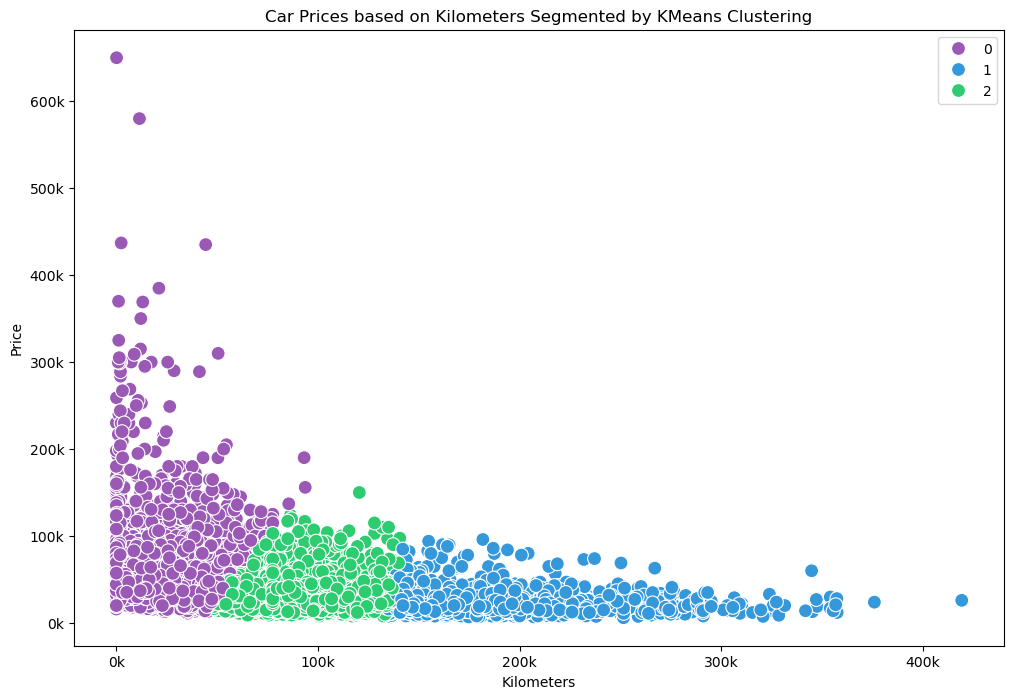

In [30]:
#plotting 
plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#9b59b6', '#3498db', '#2ecc71'])  # Dark purple, blue, green

# scatterplot 
ax = sns.scatterplot(x=df['Kilometers'], y=df['Price'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background.
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('Kilometers')
plt.ylabel('Price')

# title 
plt.title('Car Prices based on Kilometers Segmented by KMeans Clustering')

# assigning names to clusters based on the label
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'blue'
df.loc[df['clusters'] == 0, 'cluster'] = 'green'

# Format the y-axis labels to show 'Price' in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
# Format the X-axis labels to show 'Price' in thousands
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

#saving chart to PNG
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Kmeans_Prices_vs_Kilometers.png')
plt.show()


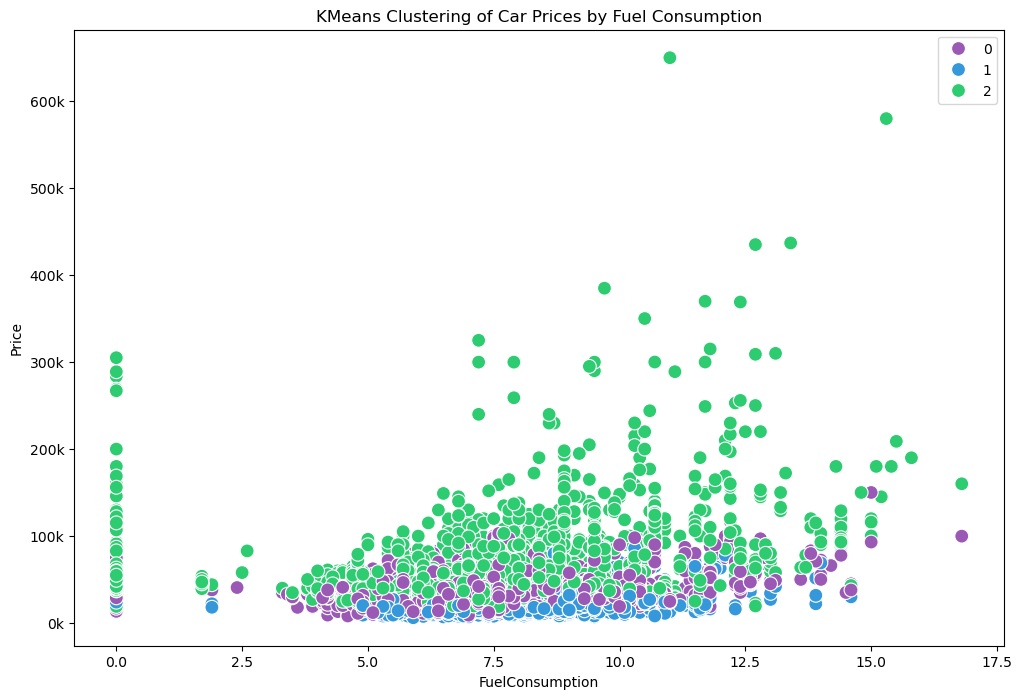

In [29]:
#plotting 
plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#9b59b6', '#3498db', '#2ecc71'])  # Dark purple, blue, green

# scatterplot 
ax = sns.scatterplot(x=df['FuelConsumption'], y=df['Price'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid 
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('FuelConsumption')
plt.ylabel('Price')

# title 
plt.title('KMeans Clustering of Car Prices by Fuel Consumption')

# assigning names to clusters based on the label
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'blue'
df.loc[df['clusters'] == 0, 'cluster'] = 'green'

# Format the y-axis labels to show 'Price' in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

#saving chart to PNG
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Kmeans_Prices_vs_FuelConsumption.png')
plt.show()


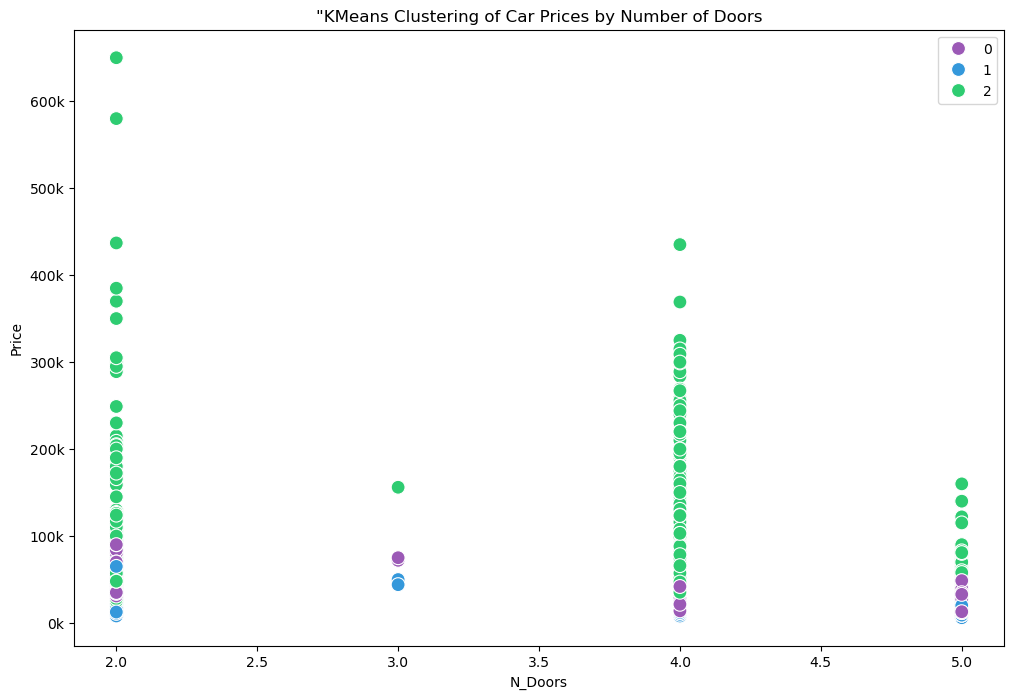

In [30]:
#plotting 
plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#9b59b6', '#3498db', '#2ecc71'])  # Dark purple, blue, green

# scatterplot 
ax = sns.scatterplot(x=df['N_Doors'], y=df['Price'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid 
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('N_Doors')
plt.ylabel('Price')

# title 
plt.title('"KMeans Clustering of Car Prices by Number of Doors')

# assigning names to clusters based on the label
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'blue'
df.loc[df['clusters'] == 0, 'cluster'] = 'green'

# Format the y-axis labels to show 'Price' in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

#saving chart to PNG
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Kmeans_Prices_vs_N_Doors.png')
plt.show()


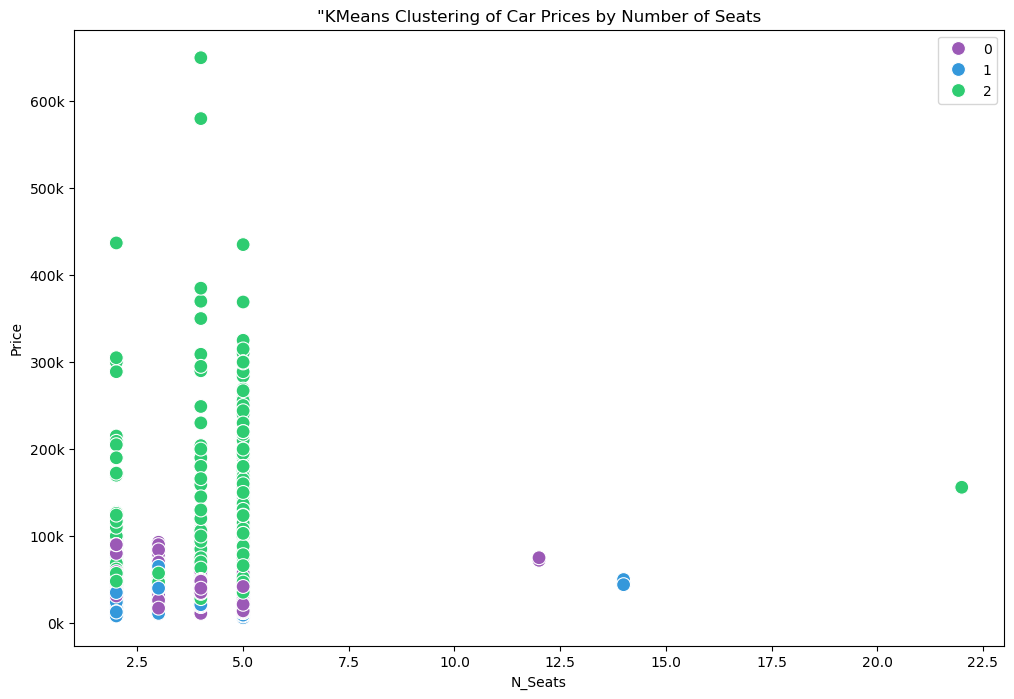

In [31]:
#plotting 
plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#9b59b6', '#3498db', '#2ecc71'])  # Dark purple, blue, green

# scatterplot 
ax = sns.scatterplot(x=df['N_Seats'], y=df['Price'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid 
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('N_Seats')
plt.ylabel('Price')

# title 
plt.title('KMeans Clustering of Car Prices by Number of Seats')

# assigning names to clusters based on the label
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'blue'
df.loc[df['clusters'] == 0, 'cluster'] = 'green'

# Format the y-axis labels to show 'Price' in thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

#saving chart to PNG
plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Kmeans_Prices_vs_N_Seats.png')
plt.show()


In [32]:
# 3D chart 

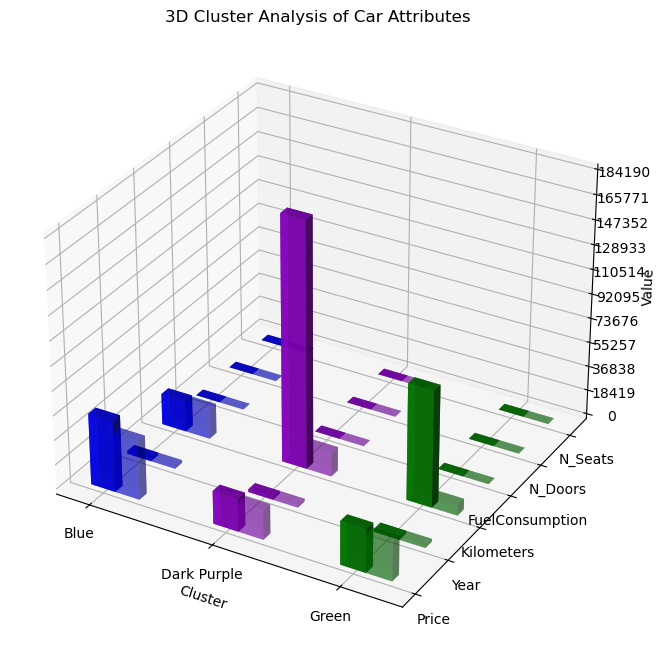

In [33]:
#3-D chart 
#plotting clusters by color, thier means and medians 
data = np.array([
    [53549, 2020, 23357, 7.22, 4, 5],  # Blue cluster mean values
    [24652, 2015, 184194, 7.96, 4, 5],  # Dark Purple cluster mean values
    [32592, 2017, 87423, 7.41, 4, 5],   # Green cluster mean values
    [43995, 2021, 22508, 7.3, 4, 5],    # Blue cluster median values
    [21999, 2015, 17921, 8.0, 4, 5],    # Dark Purple cluster median values
    [28999, 2017, 8039, 7.4, 4, 5]      # Green cluster median values
])

# Set up the figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set up the grid and the ticks
x_ticks = np.array([0, 1, 2])
y_ticks = np.arange(data.shape[1])
z_ticks = np.arange(0, int(data.max()) + 1, int(data.max() / 10))
x_labels = ['Blue', 'Dark Purple', 'Green']
y_labels = ['Price', 'Year', 'Kilometers', 'FuelConsumption', 'N_Doors', 'N_Seats']

# Define the colors and the bar width
colors = ['blue', 'darkviolet', 'green']
bar_width = 0.2

# Loop over the clusters and attributes and plot the bars
for i in x_ticks:
    for j in y_ticks:
        # Mean values
        ax.bar3d(i, j, 0, bar_width, bar_width, data[i, j], color=colors[i], alpha=0.8)
        # Median values (shorter bars)
        ax.bar3d(i + bar_width, j, 0, bar_width, bar_width, data[i + 3, j], color=colors[i], alpha=0.4)

# labels
ax.set_xticks(x_ticks + bar_width / 2)
ax.set_xticklabels(x_labels)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_zticks(z_ticks)

# title and labels
ax.set_title('3D Cluster Analysis of Car Attributes')
ax.set_xlabel('Cluster')
ax.set_zlabel('Value')

plt.savefig('/Users/user/Documents/Cars/04 Analysis/Visualizations/Kmeans_3D.png')
plt.show()
